In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ramen-ratings/ramen-ratings.csv


-What ingredients or flavors are most commonly advertised on ramen package labels?

-How do ramen ratings compare against ratings for other food products (like, say, wine)?

-How is ramen manufacturing internationally distributed?

In [2]:
import pandas as pd

In [4]:
ramen = pd.read_csv('/kaggle/input/ramen-ratings/ramen-ratings.csv')

In [5]:
ramen.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [6]:
ramen.tail(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2570,10,Smack,Vegetable Beef,Pack,USA,1.5,NaN
2571,9,Sutah,Cup Noodle,Cup,South Korea,2,NaN
2572,8,Tung-I,Chinese Beef Instant Rice Noodle,Pack,Taiwan,3,NaN
2573,7,Ve Wong,Mushroom Pork,Pack,Vietnam,1,NaN
2574,6,Vifon,Nam Vang,Pack,Vietnam,2.5,NaN
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
2579,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


In [8]:
# Check for missing values
missing_values = ramen.isnull().sum()

In [9]:
missing_values

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [10]:
ramen_clean = ramen.dropna(axis='columns')  
print(ramen_clean)

      Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety   Country Stars  
0                             T's Restaurant Tantanmen      Japan  3.75  
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...    Taiwan     1  
2                         Cup Noodles Chicken Vegetable       USA  2.25  
3                         GGE Ramen Snack Tomato Flavor    Taiwan  2.75  
4                                       Singapore Curry     India  3.75  
...                                                 ...       ...   ...  
2575  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...   Vietnam   3.5  

In [11]:
ramen_clean.head(10)

,Review #,Brand,Variety,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,India,3.75
5,2575,Samyang Foods,Kimchi song Song Ramen,South Korea,4.75
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Japan,4
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Japan,3.75
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Japan,0.25
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Singapore,2.5


In [20]:
ramen_clean['Review #'].value_counts()

Review #
2580    1
886     1
864     1
863     1
862     1
       ..
1720    1
1719    1
1718    1
1717    1
1       1
Name: count, Length: 2580, dtype: int64

In [18]:
ramen_clean['Brand'].value_counts()

Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
                ... 
Golden Wonder      1
Peyang             1
Sanrio             1
China Best         1
Westbrae           1
Name: count, Length: 355, dtype: int64

In [17]:
ramen_clean['Variety'].value_counts()

Variety
Beef                                              7
Chicken                                           7
Yakisoba                                          6
Artificial Chicken                                6
Vegetable                                         6
                                                 ..
Oh! Ricey Pho Ga                                  1
Veggie Noodle Black Sesame Noodle                 1
Nuudeli Liha Nudlar Kott                          1
Artificial Beef Instant Noodles With Soup Base    1
Tom Yum Chili Flavor                              1
Name: count, Length: 2413, dtype: int64

In [16]:
ramen_clean['Country'].value_counts()

Country
Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64

In [15]:
ramen_clean['Stars'].value_counts()

Stars
4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
1           26
0           26
2.25        21
0.5         14
0.25        11
1.25        10
5.0         10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
4.0          3
4.50         3
Unrated      3
1.1          2
2.8          2
2.9          2
4.125        2
2.3          2
3.1          2
3.0          2
2.1          1
0.9          1
0.75         1
3.125        1
2.125        1
3.00         1
0.1          1
3.3          1
3.7          1
3.4          1
3.6          1
2.85         1
3.2          1
3.65         1
1.8          1
Name: count, dtype: int64

In [22]:
ramen_clean.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


Data Visualization

In [24]:
ramen_clean.columns

Index(['Review #', 'Brand', 'Variety', 'Country', 'Stars'], dtype='object')

Japan is most country of manufacture of ramen, following by USA and South Korea

What ingredients or flavors are most commonly advertised on ramen package labels?

- Words like "noodles," "noodle," "instant," "flavour/flavor," "ramen," "cup," "with," "sauce," and "artificial" are more generic terms related to the product type or packaging

In [47]:
from collections import Counter
import re

# Preprocess the Variety column to find common keywords
# Lowercase, remove digits and punctuation for a cleaner analysis
variety_text = ' '.join(ramen_clean['Variety'].str.lower().tolist())
variety_text = re.sub(r'[^a-z\s]', '', variety_text)

# Split the text into words and count the occurrences of each word
word_counts = Counter(variety_text.split())

# Display the 20 most common words to get a sense of popular flavors/ingredients
common_words = word_counts.most_common(20)
common_words

[('noodles', 675),
 ('noodle', 519),
 ('instant', 447),
 ('flavour', 406),
 ('ramen', 342),
 ('chicken', 329),
 ('flavor', 323),
 ('spicy', 276),
 ('beef', 233),
 ('cup', 197),
 ('soup', 196),
 ('with', 170),
 ('sauce', 145),
 ('rice', 143),
 ('artificial', 133),
 ('tom', 128),
 ('curry', 127),
 ('shrimp', 127),
 ('mi', 123),
 ('hot', 119)]

Distribution of Ramen Ratings

Ramen ratings compare against ratings for other food products (like, say, wine)

/tmp/ipykernel_34/4083595750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ramen_clean['Stars'] = pd.to_numeric(ramen_clean['Stars'], errors='coerce')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


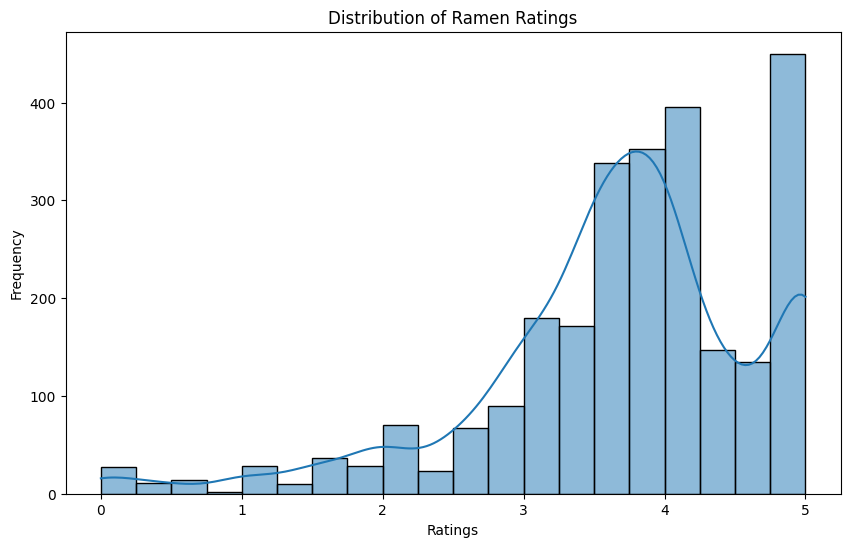

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Stars column to numeric, coercing errors for non-numeric values
ramen_clean['Stars'] = pd.to_numeric(ramen_clean['Stars'], errors='coerce')

# Drop rows with NaN values in the 'Stars' column to clean the data
ramen_ratings_cleaned = ramen_clean.dropna(subset=['Stars'])

# Plotting the distribution of ramen ratings
plt.figure(figsize=(10, 6))
sns.histplot(ramen_ratings_cleaned['Stars'], bins=20, kde=True)
plt.title('Distribution of Ramen Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


Most ramen products are rated positively, with fewer products receiving very low ratings

Ramen manufacturing internationally distributed

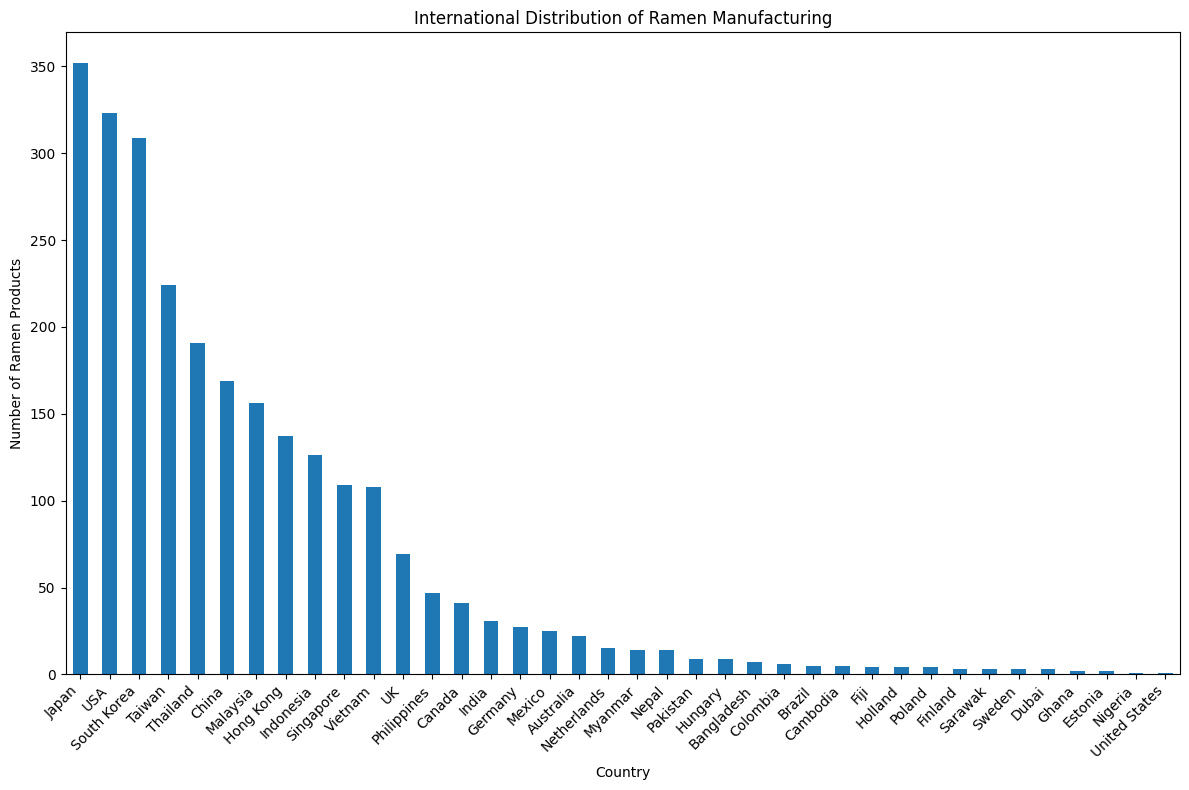

In [49]:
# Counting the number of products by country
country_counts = ramen_clean['Country'].value_counts()

# Plotting the distribution of ramen manufacturing by country
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')
plt.title('International Distribution of Ramen Manufacturing')
plt.xlabel('Country')
plt.ylabel('Number of Ramen Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Japan is the most country international distributions of ramen manufacturing, following by USA and South Korea